# <center>Prediciting Class of IRIS Species Plant<center>

![Iris](https://miro.medium.com/max/1778/1*3EFwVVPDKNoMg7cW0wcSnA.png)

### <center>We will be categorizing and predicting the class of IRIS flowers on the bases of Sepal and Petal's width and length</center>

## 1) Importing Modules

In [1]:
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score

## 2) Reading and Analysis of Data Set

In [2]:
df=pd.read_csv("iris_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df=df.dropna(subset=['petal_width_cm'])

In [5]:
df.shape

(145, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [7]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [9]:
print(df['class'].value_counts())

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64


In [10]:
df['class'].replace(["Iris-setossa","versicolor"],["Iris-setosa","Iris-versicolor"],inplace=True)
#use np.where or replace

In [11]:
print(df['class'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64


# 3) Simple Logic regression

In [12]:
final_df=df[df['class']!='Iris-virginica']
#we will remove the entries with iris_virginica

In [13]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


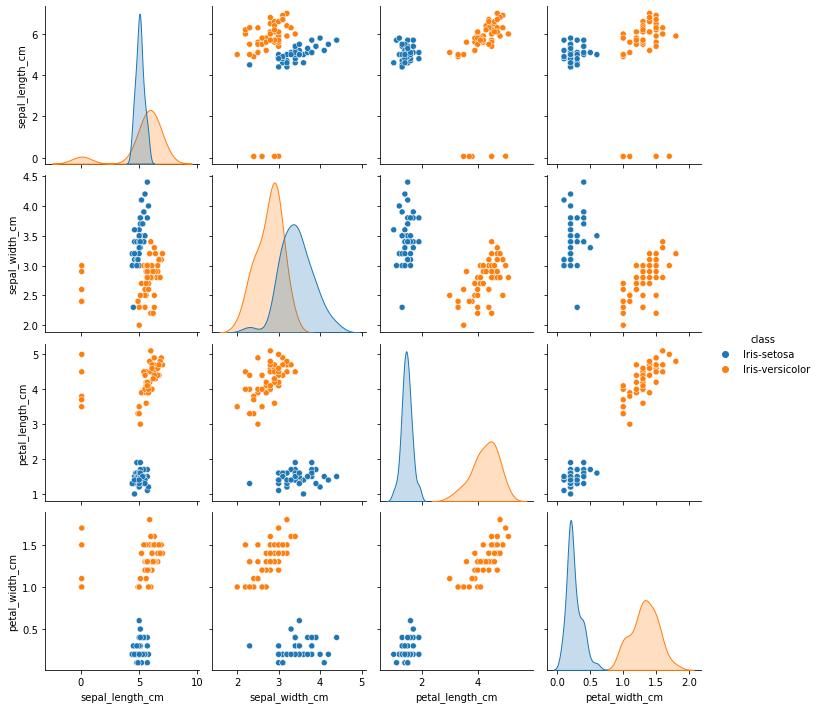

In [14]:
sns.pairplot(final_df,hue='class')
plt.show()
#the seperate data we are seeing are outliers we have to remove them now

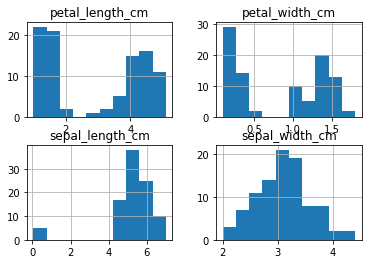

In [15]:
final_df.hist()
plt.show()

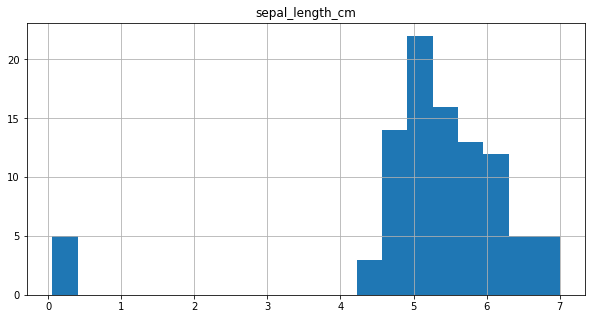

In [16]:
final_df.hist(column='sepal_length_cm',bins=20,figsize=(10,5))
plt.show()

In [17]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']]= final_df['sepal_length_cm']*100

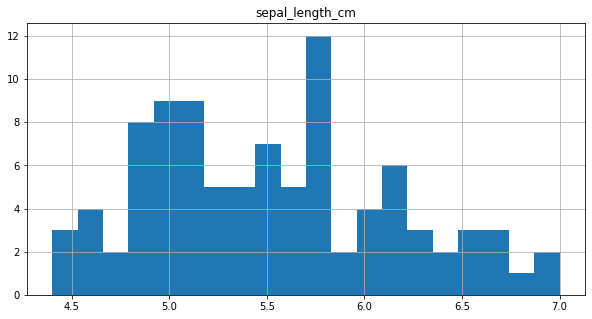

In [18]:
final_df.hist(column='sepal_length_cm',bins=20,figsize=(10,5))
plt.show()

In [19]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

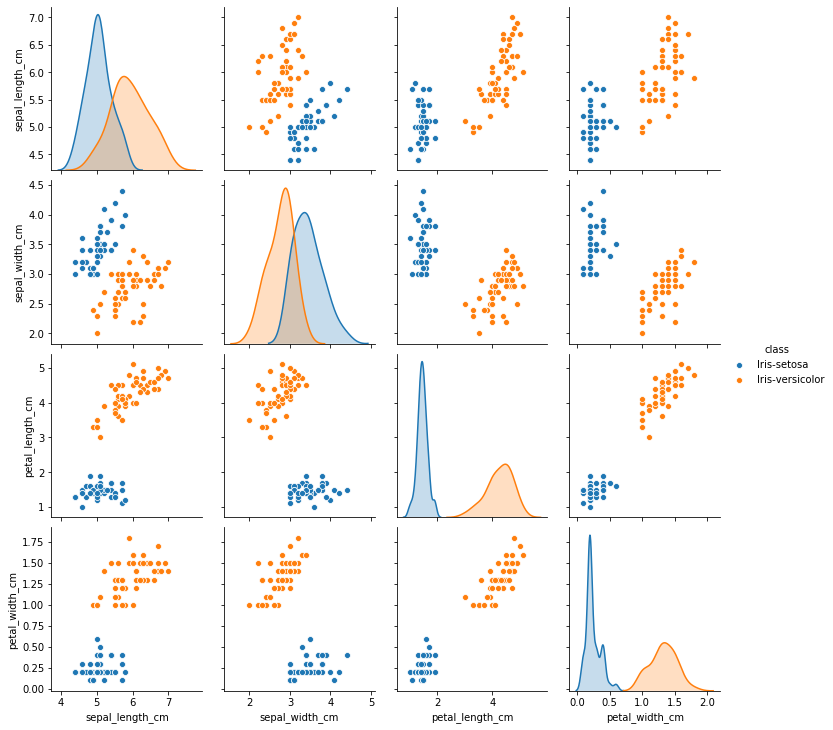

In [20]:
sns.pairplot(final_df,hue='class')
plt.show()

# 4) Converting object data to int

In [21]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

#replaceing Iris-setosa with 1 and Iris-versicolo with 0

In [22]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# 5) Model

In [23]:
inp_df=final_df.drop(final_df.columns[[4]],axis=1)   #took 4th column
out_df=final_df.drop(final_df.columns[[0,1,2,3]],axis=1) #took 0,1,2,3 colums

#we are doing this to split train and test data

In [24]:
inp_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
out_df.head()

,class
0,1
1,1
2,1
3,1
4,1


In [26]:
scaler=StandardScaler() #algorithm to fit inp_df (a part of sklear preprocessing)
inp_df=scaler.fit_transform(inp_df)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(inp_df,out_df,test_size=0.2,random_state=42)

In [29]:
X_tr_arr= X_train
X_ts_arr= X_test
y_tr_arr= y_train.values #matrix is not valid in update version of python
y_ts_arr= y_test.values

In [30]:
print('Input Shape=',X_tr_arr.shape)
print('output Shape=',X_ts_arr.shape)

Input Shape= (75, 4)
output Shape= (19, 4)


In [31]:

def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [32]:
#Get number of features
n_feature=X_tr_arr.shape[1]
print("Number of Features",n_feature)
w,b= weightInitialization(n_feature)

Number of Features 4


In [33]:
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

Optimized weights [[-0.13397714  0.13130132 -0.18248682 -0.18319564]]
Optimized intercept -0.024134631921343585


In [34]:
# we'll use sigmoid for final prediction

In [35]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

In [36]:
m_tr=X_tr_arr.shape[0]
m_ts=X_ts_arr.shape[0]

In [37]:
y_tr_pred = predict(final_train_pred, m_tr)
acc_tr=accuracy_score(y_tr_pred.T, y_tr_arr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

Training Accuracy 1.0


In [38]:
y_ts_pred = predict(final_test_pred, m_ts)
acc_ts=accuracy_score(y_ts_pred.T, y_ts_arr)
print('Test Accuracy',acc_ts)

Test Accuracy 1.0


In [39]:
print({"Train Accuracy":acc_tr,"Test Accuracy":acc_ts})

{'Train Accuracy': 1.0, 'Test Accuracy': 1.0}


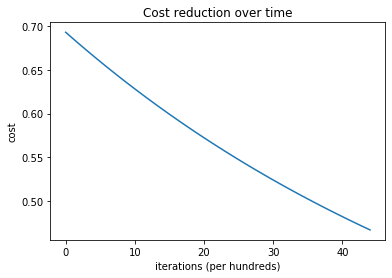

In [40]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [41]:
#Error in below code (EXTRA STUFF)

#result_df = {"Actual": y_tr_arr,
#                 "Predicted": y_ts_pred.T}
#result_r = pd.DataFrame(result_df, orient = 'index')
#result_r.head(10)